In [3]:
import pandas as pd
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
us_disaster_declarationsDataSet_filename = os.path.join(os.getcwd(), "FW_Veg_Rem_Combined.csv")
df = pd.read_csv(us_disaster_declarationsDataSet_filename)

In [27]:
# 2. Convert the 'disc_clean_date' column to datetime format
# Assuming the date format is '0/00/0000' (month/day/year)
df['disc_clean_date'] = pd.to_datetime(df['disc_clean_date'], format='%m/%d/%Y', errors='coerce')

# 3. Filter the dataset for the year 2015
data_2015 = df[df['disc_clean_date'].dt.year == 2015]


# 4. Print the filtered DataFrame
print(data_2015)


       Unnamed: 0.1  Unnamed: 0           fire_name  fire_size  \
11               11          11    SWR-20150212-008       37.0   
49               49          49             2015-98        1.0   
56               56          56     LED BETTER BARN       15.3   
95               95          95  FY2015-LAURENS-107        4.0   
96               96          96    TAYLOR FURY (54)        1.0   
...             ...         ...                 ...        ...   
55362         55362       55362              IMPACT     6289.0   
55363         55363       55363               BUTTE    70868.0   
55364         55364       55364              WILLOW     5702.0   
55365         55365       55365              BARKER     3261.0   
55366         55366       55366              VALLEY    76067.0   

      fire_size_class   stat_cause_descr   latitude   longitude state  \
11                  C              Arson  31.195108  -88.150651    AL   
49                  B      Miscellaneous  32.232007  -94.4783

In [36]:
import plotly.express as px
import pandas as pd

# Create a custom map using Plotly Express
fig = px.scatter_geo(
    data_2015,
    lat="latitude",
    lon="longitude",
    projection="natural earth",  # You can use other projections as well
    title="2015 Fire Map",
)

# Set the center of the map to include Puerto Rico
fig.update_geos(center=dict(lon=-66, lat=18))
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig.update_traces(marker=dict(color='purple'))

# Show the map
fig.show()


/var/folders/2g/55rbl8yx08s1gz7_nsqrjglr0000gq/T/ipykernel_50414/4261205584.py:12: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




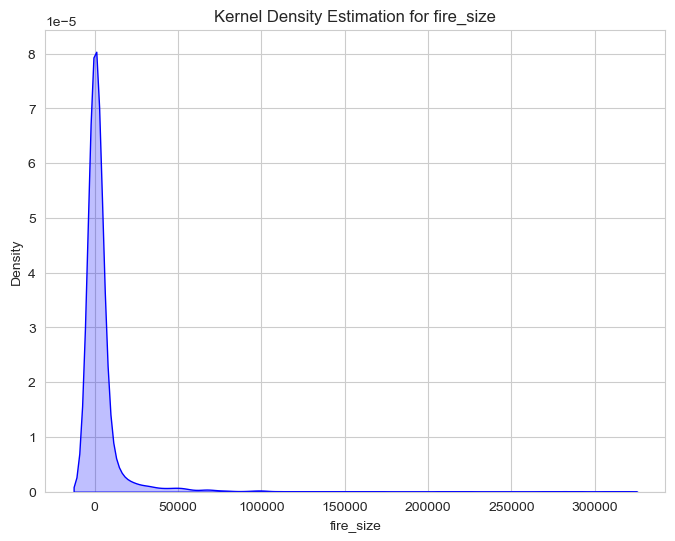

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the column from your DataFrame to visualize
column_to_visualize = 'fire_size'  # Replace with the column name you want to visualize

# Create a KDE plot
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')  # Set the style of the plot

# Create the KDE plot using Seaborn
sns.kdeplot(data=data_2015[column_to_visualize], shade=True, color='blue')
plt.title(f'Kernel Density Estimation for {column_to_visualize}')
plt.xlabel(column_to_visualize)

# Show the KDE plot
plt.show()


In [61]:
import plotly.express as px

# Filter the dataset for the year 2015
fire_df_2015 = df[df['disc_clean_date'].dt.year == 2015]

# Create a KDE map using Plotly Express
kde_fig = px.density_mapbox(
    fire_df_2015,
    lat='latitude',
    lon='longitude',
    radius=6,  # Adjust the radius as needed
    center=dict(lat=18.2208, lon=-66.5901),  # Center the map to include the USA and Puerto Rico
    zoom=3,  # Set the initial zoom level to your preference
    mapbox_style="open-street-map",  # Choose the map style
    title="Fire Incidents 2015 KDE Map",
)

# Set the width and height of the plot
kde_fig.update_layout(
    width=1000,  # Adjust the width as needed
    height=600,  # Adjust the height as needed
)

# Create a scatter plot of fire incident data
scatter_fig = px.scatter_geo(
    fire_df_2015,
    lat='latitude',
    lon='longitude',
    text='fire_name',  # Display fire name as text on hover
    color='fire_size_class',  # Color the data points by fire size class
    size='fire_size',  # Adjust the size of data points based on fire size
    opacity=0.7,  # Adjust opacity for better visibility
    projection="natural earth",  # Use a natural earth projection for better spatial representation
)

# Add the scatter plot to the KDE plot
kde_fig.add_trace(scatter_fig.data[0])

# Customize the map layout (optional)
kde_fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgrey")

# Show the combined map
kde_fig.show()

